# swapping brians and auroras gilmore_hall_main_a and gilmore_hall_main_b meters

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# brian input csv
brian_csv = 'processed_kw.csv'

# aurora input csv
aurora_csv = 'aurora_processed_kw.csv'

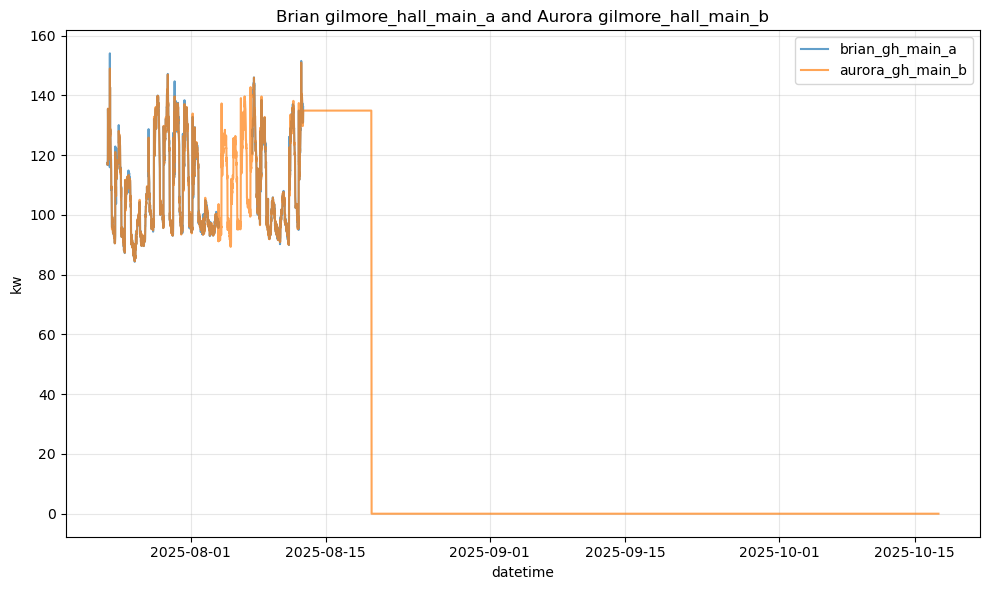

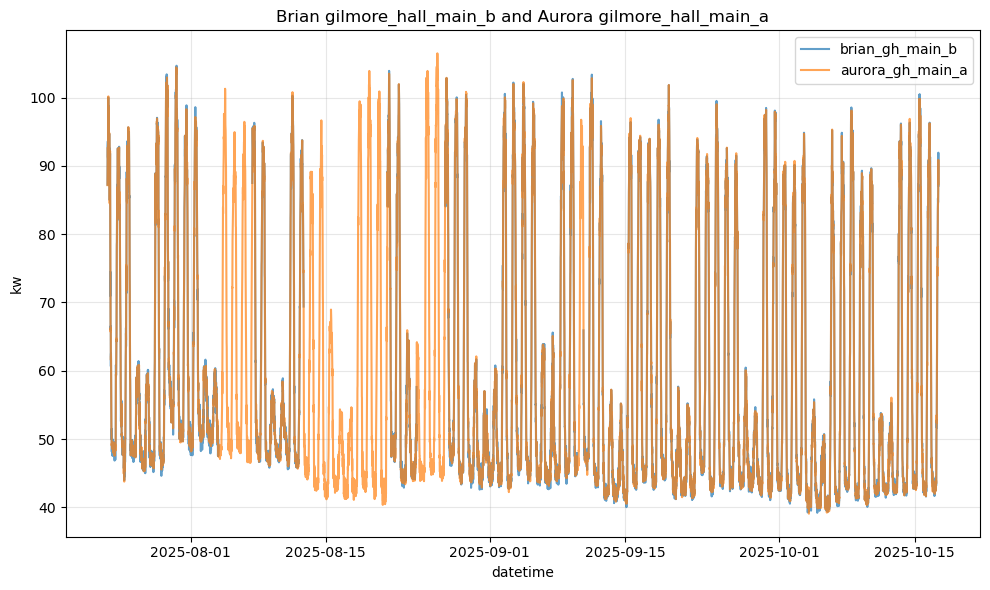

In [7]:
df = pd.read_csv(brian_csv, encoding='utf-8')
adf = pd.read_csv(aurora_csv, encoding='utf-8')

df = df[df['meter_name'].isin(['gilmore_hall_main_a', 'gilmore_hall_main_b'])]
adf = adf[adf['meter_name'].isin(['gilmore_hall_main_a', 'gilmore_hall_main_b'])]

df['datetime'] = pd.to_datetime(df['datetime'])
adf['datetime'] = pd.to_datetime(adf['datetime'])

# graph brians gilmore_hall_main_a with auroras gilmore_hall_main_b
brian_main_a = df[df['meter_name'] == 'gilmore_hall_main_a'].sort_values('datetime').drop(columns='meter_name')
aurora_main_b = adf[adf['meter_name'] == 'gilmore_hall_main_b'].sort_values('datetime').drop(columns='meter_name')
merged_ba_ab = pd.merge(brian_main_a, aurora_main_b, on=['datetime'], how='outer')

plt.figure(figsize=(10, 6))
plt.plot(merged_ba_ab['datetime'], merged_ba_ab['mean_kw'],label='brian_gh_main_a', alpha=0.7)
plt.plot(merged_ba_ab['datetime'], merged_ba_ab['mean'], label='aurora_gh_main_b', alpha=0.7)

plt.xlabel('datetime')
plt.ylabel('kw')
plt.title('Brian gilmore_hall_main_a and Aurora gilmore_hall_main_b')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

# graph brians gilmore_hall_main_b with auroras gilmore_hall_main_a
brian_main_b = df[df['meter_name'] == 'gilmore_hall_main_b'].sort_values('datetime').drop(columns=['meter_name'])
aurora_main_a = adf[adf['meter_name'] == 'gilmore_hall_main_a'].sort_values('datetime').drop(columns=['meter_name'])
merged_bb_aa = pd.merge(brian_main_b, aurora_main_a, on=['datetime'], how='outer')

plt.figure(figsize=(10, 6))
plt.plot(merged_bb_aa['datetime'], merged_bb_aa['mean_kw'],label='brian_gh_main_b', alpha=0.7)
plt.plot(merged_bb_aa['datetime'], merged_bb_aa['mean'], label='aurora_gh_main_a', alpha=0.7)

plt.xlabel('datetime')
plt.ylabel('kw')
plt.title('Brian gilmore_hall_main_b and Aurora gilmore_hall_main_a')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()